In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(1)
np.random.seed(1)

In [2]:
# Hyper Parameters
TIME_STEP = 10 # rnn time step
INPUT_SIZE = 1
CELL_SIZE = 32
LR = 0.02

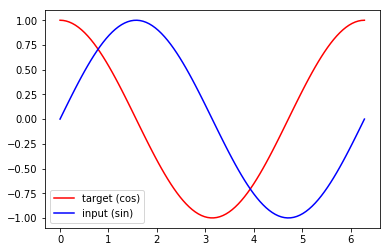

In [3]:
# have a look
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

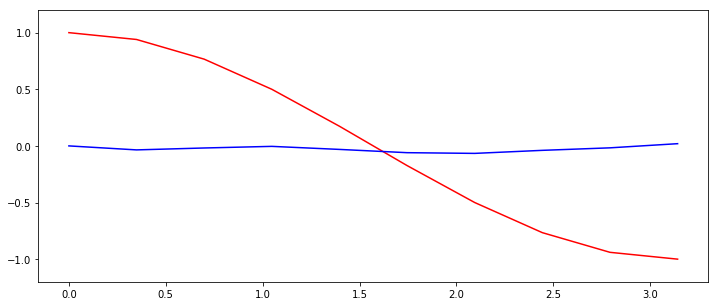

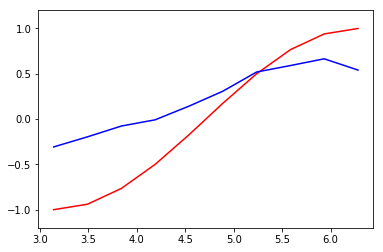

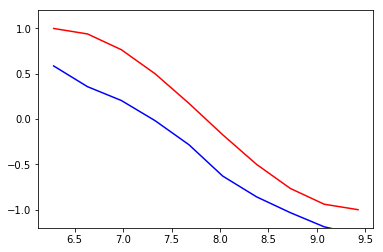

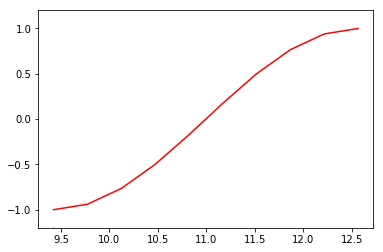

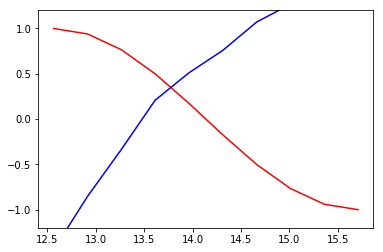

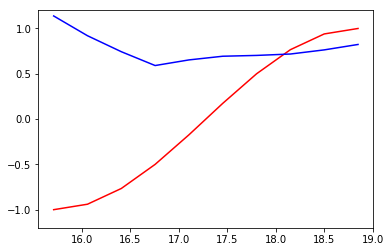

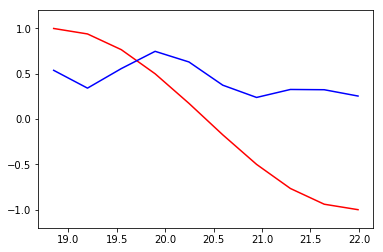

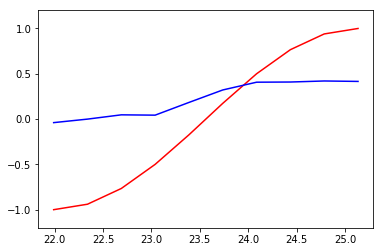

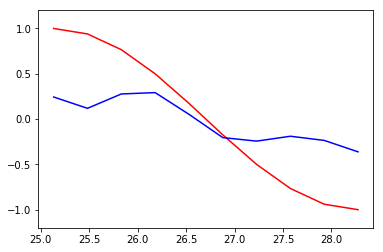

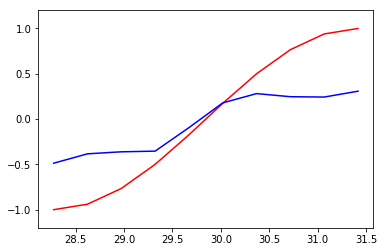

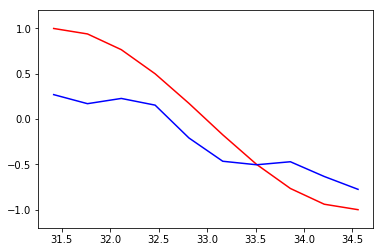

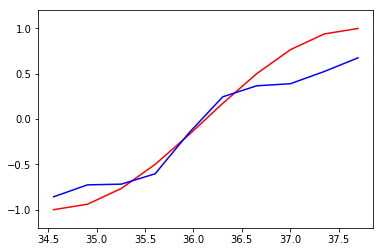

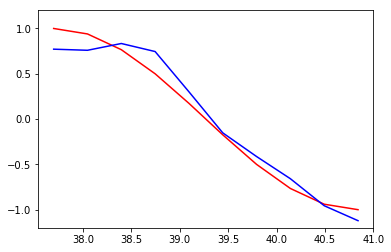

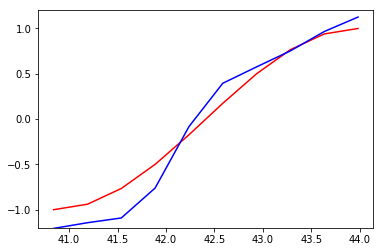

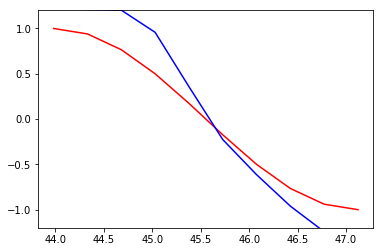

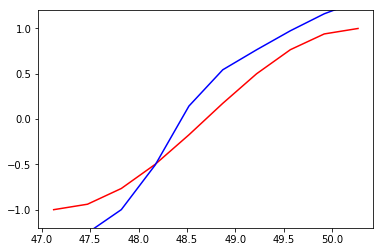

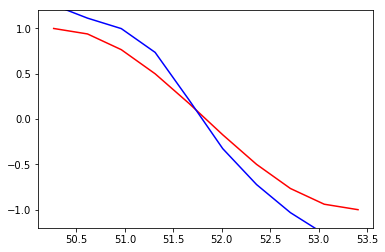

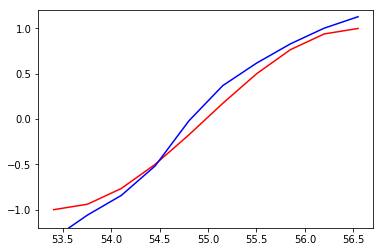

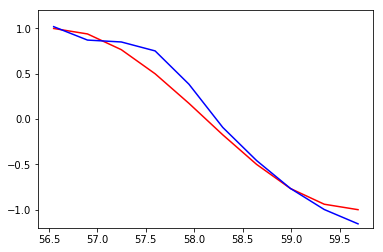

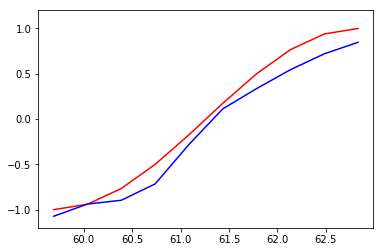

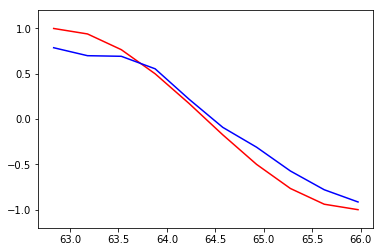

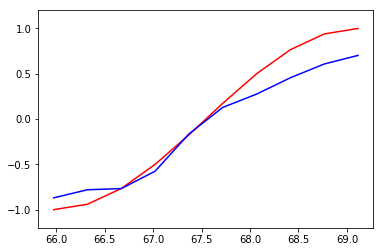

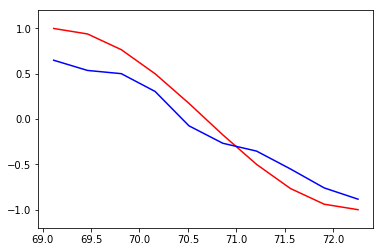

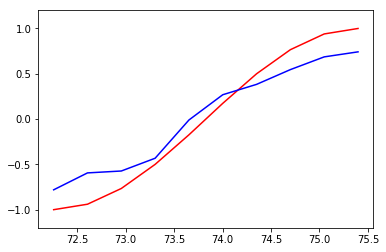

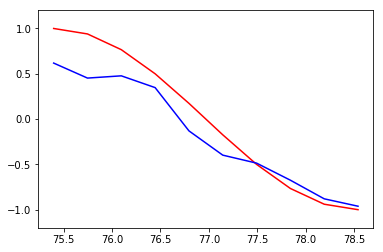

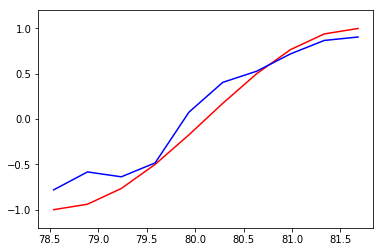

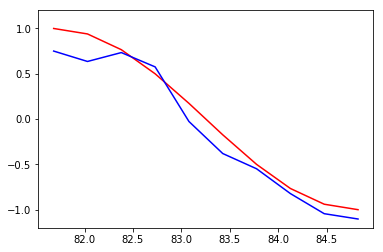

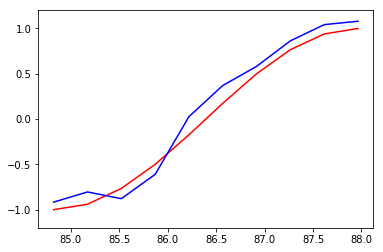

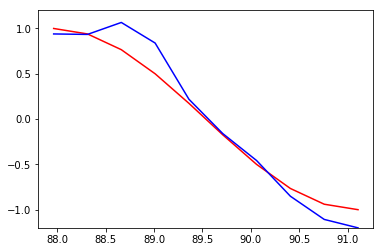

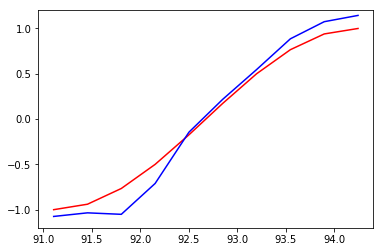

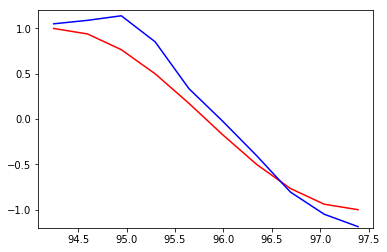

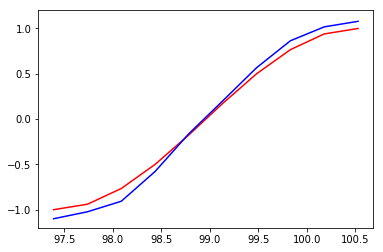

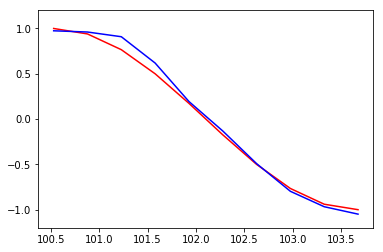

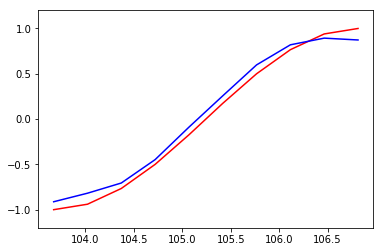

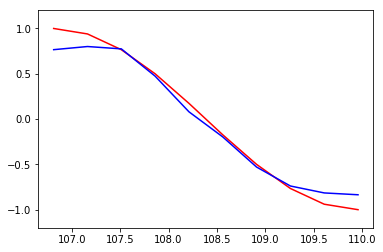

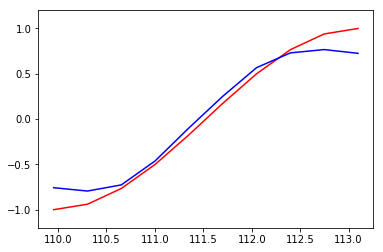

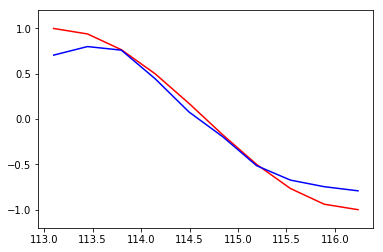

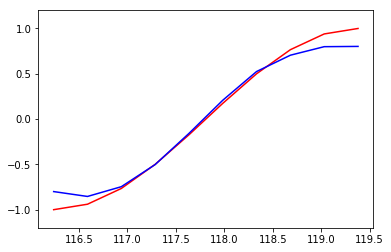

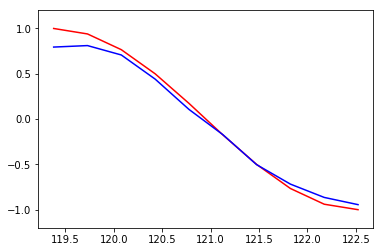

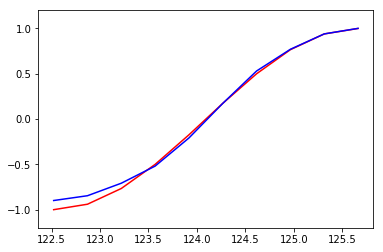

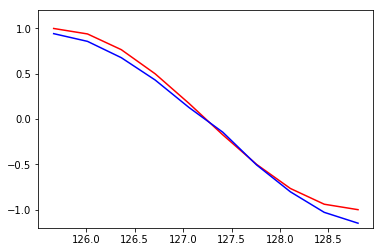

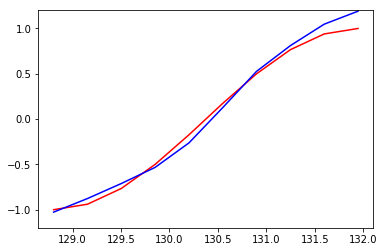

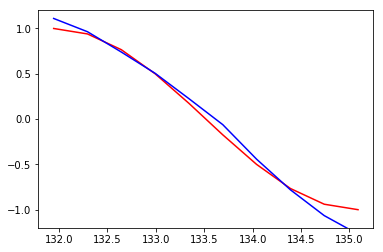

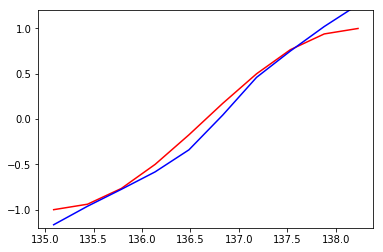

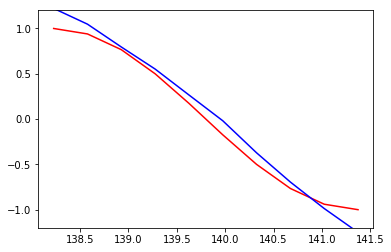

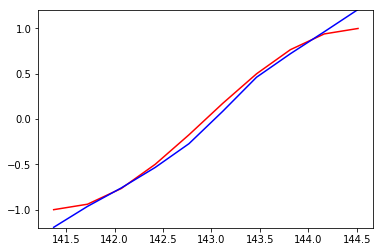

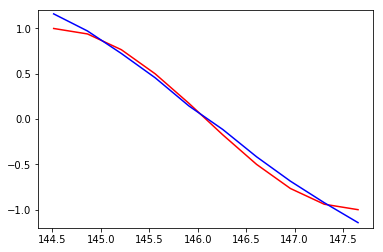

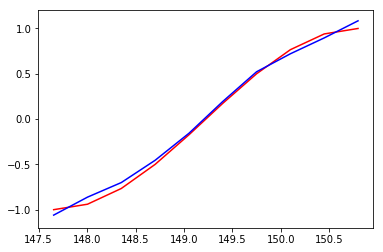

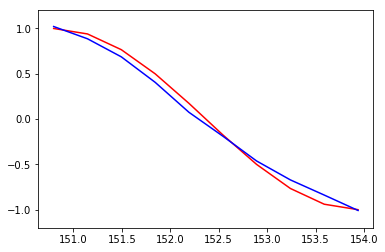

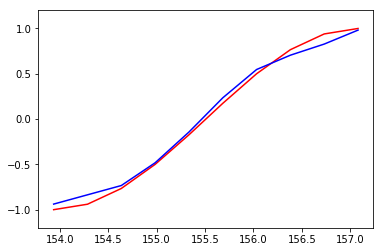

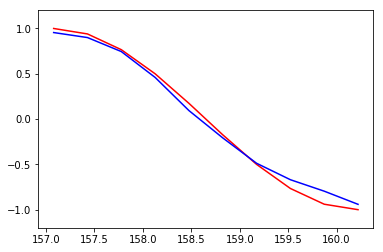

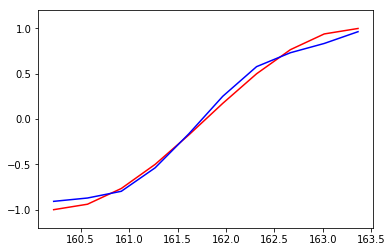

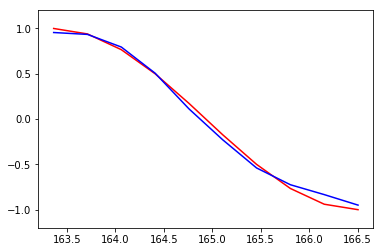

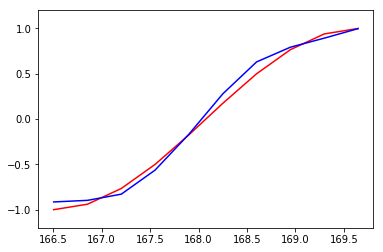

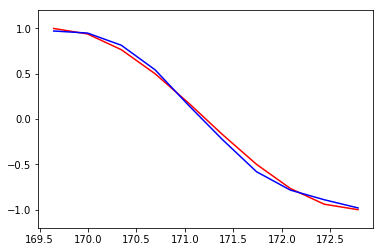

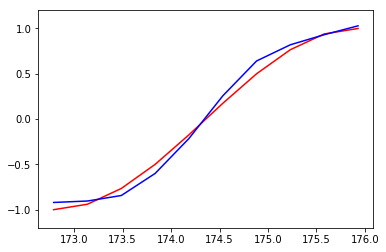

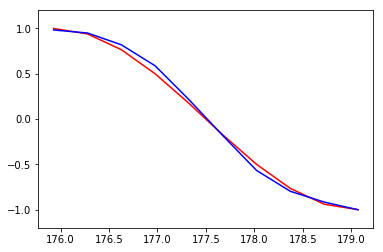

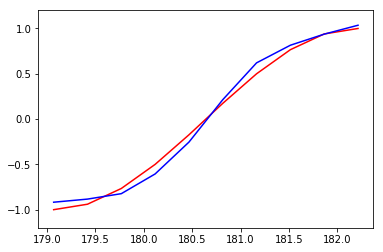

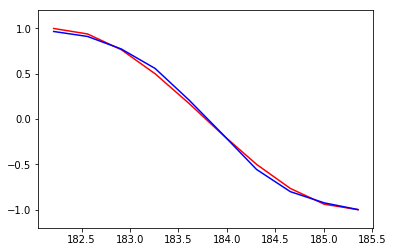

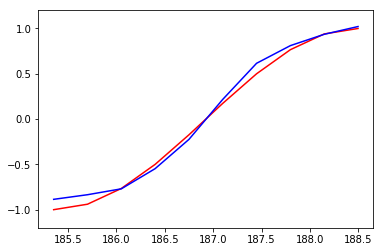

In [8]:
with tf.Graph().as_default(), tf.Session() as sess:
    tf_x = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])
    tf_y = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])
    
    # RNN
    rnn_cell = tf.contrib.rnn.BasicRNNCell(num_units=CELL_SIZE)
    init_s = rnn_cell.zero_state(batch_size=1, dtype=tf.float32)
    outputs, final_s = tf.nn.dynamic_rnn(
        rnn_cell, # cell 
        tf_x, # input
        initial_state = init_s,
        time_major = False,
    )
    outs2D = tf.reshape(outputs, [-1, CELL_SIZE])
    net_outs2D = tf.layers.dense(outs2D, INPUT_SIZE)
    outs = tf.reshape(net_outs2D, [-1, TIME_STEP, INPUT_SIZE])
    
    loss = tf.losses.mean_squared_error(labels=tf_y, predictions=outs)
    train_op = tf.train.AdamOptimizer(LR).minimize(loss)
    
    # initialization
    sess.run(tf.global_variables_initializer())
    
    # plot
    plt.figure(1, figsize=(12, 5))
    plt.ion() # continuously plot
    
    for step in range(60):
        start, end = step*np.pi, (step+1)*np.pi # time range
        # use sin predicts cos
        steps = np.linspace(start, end, TIME_STEP)
        x = np.sin(steps)[np.newaxis, :, np.newaxis] # shape (batch, time_step, input_size)
        y = np.cos(steps)[np.newaxis, :, np.newaxis]
        if 'final_s_' not in globals():
            feed_dict = {tf_x:x, tf_y:y}
        else:
            feed_dict = {tf_x:x, tf_y:y, init_s: final_s_}
        _, pred_, final_s_ = sess.run([train_op, outs, final_s], feed_dict)# train
        
        # plotting
        plt.plot(steps, y.flatten(), 'r-')
        plt.plot(steps, pred_.flatten(), 'b-')
        plt.ylim((-1.2, 1.2))
        plt.draw()
        plt.pause(0.05)
    plt.ioff()
    plt.show()